# Project Introduction: 

In this project, you will formulate how to generate samples of exponential distribution, with PDF 
𝑓<sub>𝑋</sub>(𝑥) = 𝜆𝑒<sup>−𝜆𝑥</sup> for 𝑥 > 0, from uniformly distributed samples in the interval [0,1]. The uniformly 
distributed samples can be generated by a Matlab function (see ref. [1]), such as <i>rand</i>, or a Python 
equivalent <i>numpy.random.uniform</i>, which returns random samples in the interval [0,1].

A uniformly distributed random number generator produces a random number in the interval 
[0,1]. Because a probability always lies between 0 and 1, we can use these random numbers to draw 
random values from any well-defined probability distribution, that is called inverse transformation 
method (see ref. [2]). In this project, we follow the inverse transformation method to develop a 
computer program (Matlab or Python) that generate samples of exponential distribution.

# Problems: 

# (1)
The exponential random variable arises in the modelling of the time between occurrences of 
events. An engineer is building a model to observe the distribution of the lifetime 𝑇 for an 
electronic component. Suppose that the time 𝑇 (in year) belongs to an exponential 
distribution (𝑓(𝑥) = 𝜆𝑒<sup>−𝜆𝑥</sup>, 𝑥 > 0), with an expected value of 𝑡 years. For 𝑡 = 3, 4, 5, please
report the followings: 

a. Express the PDF and CDF functions.  
b. Calculate 𝜆 for 𝑡 = 3, 4, 5.  
c. Plot the PDF and CDF for 𝑡 = 3, 4, 5 using Matlab (or Python) in the same figure.  
d. Explain how to compute the probability 𝑝 of a component that lasts beyond 5 years, 
and report 𝑝 for 𝑡 = 3, 4, 5.  
e. How and why does 𝑝 change when we change 𝑡? Please discuss. 


notes:  
expected value E[T] = 1/𝜆 = 𝑡  
𝑓(𝑥) = 𝜆𝑒<sup>−𝜆𝑥</sup>, 𝑥 > 0 --> 𝑓(𝑥) = (1/𝑡)* 𝑒<sup>−(𝑥/𝑡)</sup>, 𝑥 > 0

𝑝 = 1 - CDF(x=5) = 𝑒<sup>−(5/𝑡)</sup>  
as 𝑡 increases, (5/𝑡) decreases, 𝑒<sup>(5/𝑡)</sup> decreases, 𝑒<sup>−(5/𝑡)</sup> increases

E[T] = 1/lambda = t, 
i.e. for t=[3, 4, 5], lambda=[0.3333333333333333, 0.25, 0.2]

t = 3:
PDF = 𝜆𝑒^(−𝜆𝑥) = (1/𝑡)* 𝑒^−(𝑥/𝑡) = 0.3333333333333333e^(-0.3333333333333333𝑥)
CDF = 1 - 𝑒^(−𝜆𝑥) = 1 - 𝑒^−(𝑥/𝑡) = 1 - e^(-0.3333333333333333𝑥)
𝑝 = e^(-0.3333333333333333𝑥) = 0.18887560283756188

t = 4:
PDF = 𝜆𝑒^(−𝜆𝑥) = (1/𝑡)* 𝑒^−(𝑥/𝑡) = 0.25e^(-0.25𝑥)
CDF = 1 - 𝑒^(−𝜆𝑥) = 1 - 𝑒^−(𝑥/𝑡) = 1 - e^(-0.25𝑥)
𝑝 = e^(-0.25𝑥) = 0.2865047968601901

t = 5:
PDF = 𝜆𝑒^(−𝜆𝑥) = (1/𝑡)* 𝑒^−(𝑥/𝑡) = 0.2e^(-0.2𝑥)
CDF = 1 - 𝑒^(−𝜆𝑥) = 1 - 𝑒^−(𝑥/𝑡) = 1 - e^(-0.2𝑥)
𝑝 = e^(-0.2𝑥) = 0.36787944117144233



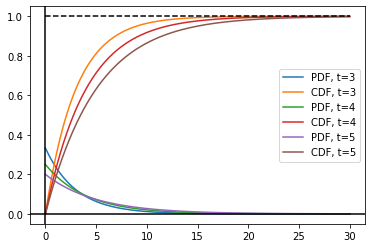

In [24]:
## working file for testing!! code for submission in the next cell

import numpy as np
import matplotlib.pyplot as plt

t = [3,4,5]
lbd = [1/i for i in t]
print ('E[T] = 1/lambda = t, ')
print('i.e. for t='+str(t)+', lambda='+str(lbd))
print('')

for i in range(0, len(t)):
    print('t = '+str(t[i])+':')
    print('PDF = 𝜆𝑒^(−𝜆𝑥) = (1/𝑡)* 𝑒^−(𝑥/𝑡) = '+str(lbd[i])+'e^(-'+str(lbd[i])+'𝑥)')
    print('CDF = 1 - 𝑒^(−𝜆𝑥) = 1 - 𝑒^−(𝑥/𝑡) = 1 - e^(-'+str(lbd[i])+'𝑥)')
    print('𝑝 = e^(-'+str(lbd[i])+'𝑥) = '+str(np.e**(-5*lbd[i])))
    print('')
    x = np.linspace(0, 30, 1000)
    pdf = lbd[i] * (np.e **(-lbd[i]*x))
    cdf = 1 - (np.e **(-lbd[i]*x))
    lbl = 't='+str(t[i])
    plt.plot(x,pdf,label='PDF, '+lbl)
    plt.plot(x,cdf,label='CDF, '+lbl)
    
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.plot([0,30],[1,1], c="black", ls='--' )
plt.legend()
plt.show()
    

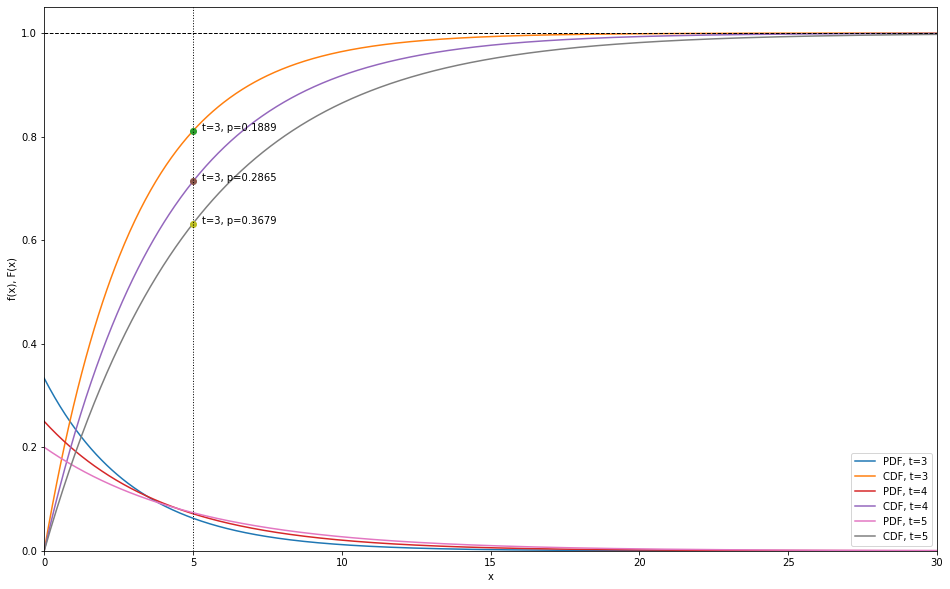

In [45]:
import numpy as np                # import numpy for math 
import matplotlib.pyplot as plt   # import matplotlib for plotting graphs

t = [3,4,5]    # values of t

##Question 1

plt.figure(0, figsize=(16,10))        # dimensions of plot figure

for i in t:                           # loop over values of t
    x = np.linspace(0, 35, 1000)      # generate list of 1000 x values between 0 and 35 (wide enough to show F(x) approach 1 asymptotically)
    
    pdf = (1/i) * (np.e **(-(1/i)*x)) # calculate PDF values
    cdf = 1 - (np.e **(-(1/i)*x))     # calculate CDF values

    plt.plot(x,pdf,label='PDF, t='+str(i)) # plot PDF with label
    plt.plot(x,cdf,label='CDF, t='+str(i)) # plot CDF with label
    
    p= np.e** (-5/i)                  # calculate p
    plt.plot(5,1-p, 'o')              # plot round dots (x, 1-p) -- p is the cumulative probability of f(x>=5) = 1-F(x<5)
    plt.text(5.3,1-p, lbl+', p='+'%.4f' % p)  # text label for the points.
    

plt.axhline(1, c='black', lw=1, ls = '--')  # y=1 asymptote to show CDF approaching 1
plt.axvline(5, c='black', lw=1, ls = ':')   # vertical line x=5 to show CDF-intercepts (for Q1d,e)
plt.xlim([0,30])      # left and right bound for plot display
plt.ylim([0,1.05])    # top and bottom bound for plot display
plt.ylabel('f(x), F(x)') # y-axis label
plt.xlabel('x')          # x-axis label
plt.legend()         # display legend
plt.show()           # show plot (if running outside jupyter)

# (2)  
Formulate and explain the mathematical steps to generate samples of the exponential 
distribution in Problem (1) from uniformly distributed samples in the interval (0,1). Please
report the followings:  

a. Formulate and explain the mathematical steps of the inverse transformation method.  
b. Develop a script that implements the steps. Generate 1000 such samples of 
exponential distribution for 𝑡 = 4.  
c. Plot the (normalized) histogram of these samples together with the PDF plot for 𝑡𝑡 =
4 in the same figure.   
d. Elaborate the results that you have generated in 2.c (For example, the normalized 
histogram obtained, how well the histogram fits to the PDF, how to generate random 
numbers for other continuous distributions).  

Please note that you must generate uniformly distributed samples first, and ‘transform’ them 
into samples of the exponential distribution. You need to show the random samples after 
transformation is exponential distributed.